### Neural network
- Artificial Neural Network (ANN)
- Deep Neural Network (DNN)
- Convolutional Neural Network (CNN)
- Recurrent Neural Network (RNN)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### DNN, Deep Neural Network

In [2]:
np.random.seed(42)

x = np.random.normal(loc=0.0, scale=1.0, size=(10000, 10))
y = np.random.normal(loc=0.0, scale=1.0, size=(10000, ))
y = y + np.sin(x[:,1]) * 2.0 + np.exp(-x[:,2]**2) * 0.4

print(x)

[[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01 ...  7.67434729e-01
  -4.69474386e-01  5.42560044e-01]
 [-4.63417693e-01 -4.65729754e-01  2.41962272e-01 ...  3.14247333e-01
  -9.08024076e-01 -1.41230370e+00]
 [ 1.46564877e+00 -2.25776300e-01  6.75282047e-02 ...  3.75698018e-01
  -6.00638690e-01 -2.91693750e-01]
 ...
 [ 1.12824294e-03 -1.04756920e+00  2.82284533e-01 ...  4.52383287e-01
  -1.31267324e+00  1.03130848e+00]
 [ 9.28168542e-01 -8.87349547e-01 -5.40579723e-01 ... -1.82854599e+00
   7.39980889e-01 -5.90794412e-01]
 [ 6.43914505e-01  8.25925429e-01 -2.13369784e-01 ...  4.09185078e-01
  -2.11091671e-01  1.20062941e-01]]


In [3]:
model = Sequential()
layers.Dense(128, activation='relu', input_shape=(10,), kernel_regularizer=tf.keras.regularizers.l2(0.001))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

his = model.fit(x, y, epochs=500, batch_size=32)

print("\n Accuracy: %.4f" % (model.evaluate(x, y)[1]))

C:\Users\witho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9154 - mae: 1.0931
Epoch 2/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1358 - mae: 0.8416
Epoch 3/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1006 - mae: 0.8276
Epoch 4/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0679 - mae: 0.8171
Epoch 5/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0441 - mae: 0.8104
Epoch 6/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0136 - mae: 0.7994
Epoch 7/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0080 - mae: 0.7958
Epoch 8/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9883 - mae: 0.7883
Epoch 9/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0014 - mae: 0.7923
Epoch 10/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0150 - mae: 0.7989
Epoch 11/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9920 - mae: 0.7897
Epoch 12/500
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9845 - mae: 0.7884
Epoch 13/500


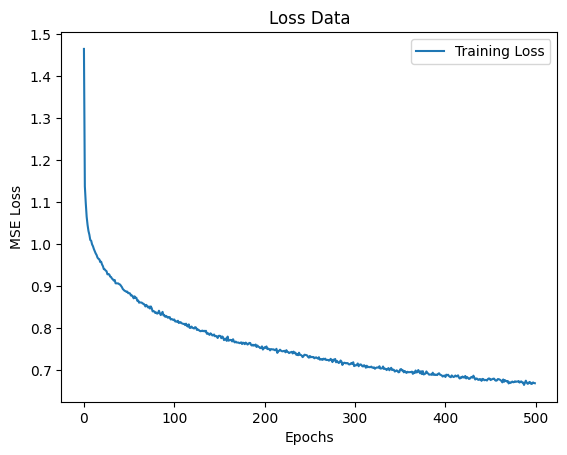

In [4]:
plt.plot(his.history['loss'], label='Training Loss')
plt.title("Loss Data")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

#### ANN, Artificial Neural Network

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


In [6]:
x = np.random.normal(loc=0.0, scale=1.0, size=(10000, 10))
y = (np.sum(x, axis=1) > 0).astype(float)
y = y + np.sin(x[:, 1]) * 2.0 + np.exp(-x[:, 2]**2) * 0.4


In [7]:
X_tensor = torch.FloatTensor(x)
y_tensor = torch.FloatTensor(y).unsqueeze(1)

model = nn.Sequential(
    nn.Linear(10, 1),
)

losses = []

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

for epoch in range(100):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

with torch.no_grad():
    predictions = (model(X_tensor) > 0.5).float()
    accuracy = (predictions == y_tensor).float().mean()
    print(f"모델의 정확도: {accuracy.item():.4f}")

Epoch 0, Loss: 3.7356
Epoch 10, Loss: 0.9158
Epoch 20, Loss: 0.4043
Epoch 30, Loss: 0.4654
Epoch 40, Loss: 0.4016
Epoch 50, Loss: 0.3849
Epoch 60, Loss: 0.3866
Epoch 70, Loss: 0.3820
Epoch 80, Loss: 0.3824
Epoch 90, Loss: 0.3819
모델의 정확도: 0.0000


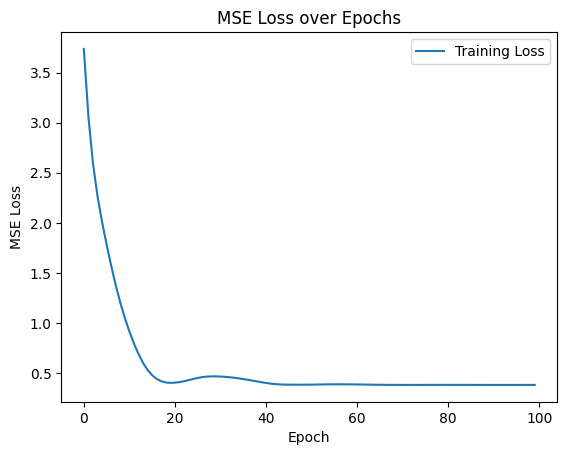

In [8]:
plt.plot(losses, label='Training Loss')
plt.title("MSE Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()